In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"D:\Downloads\car_price_prediction.csv\car_price_prediction.csv")

1-Explore Data

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
data.duplicated().sum()

np.int64(313)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.shape

(18924, 18)

In [11]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

2.Analysis

In [12]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [14]:
for col in data.columns:
    print(col,":",data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


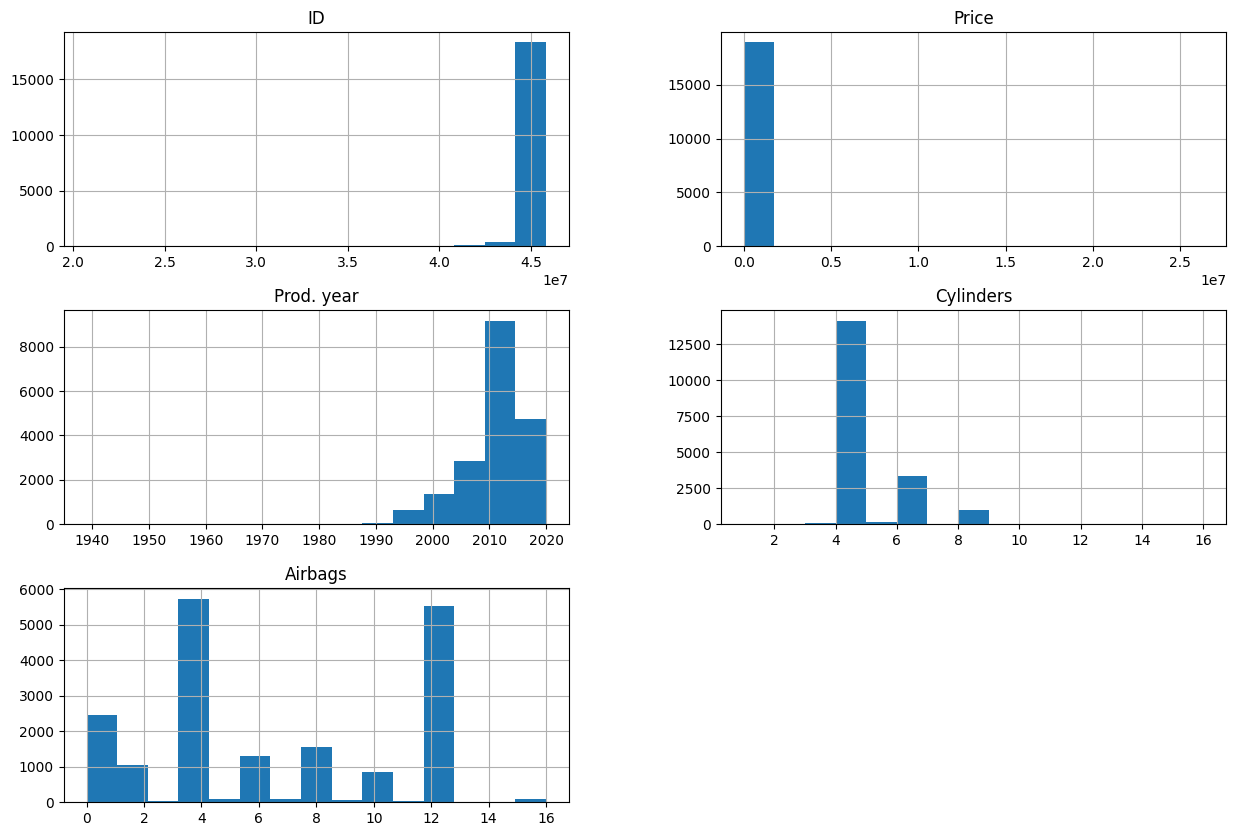

In [15]:
data.hist(bins=15,figsize=(15,10))
plt.show()

In [16]:
top10cars=data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

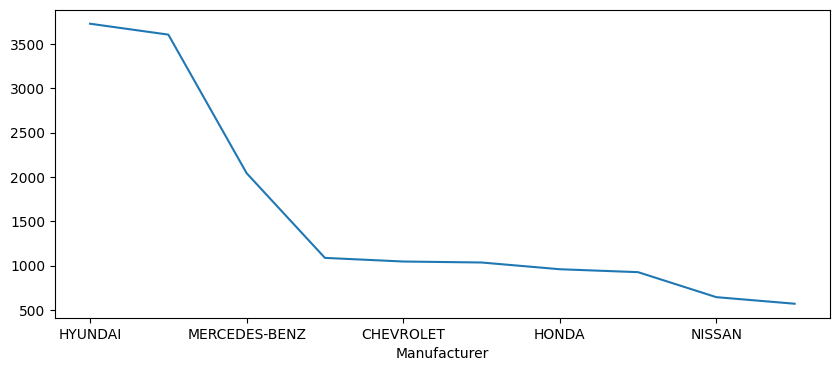

In [17]:
top10cars.plot(figsize=(10,4))
plt.show()

In [18]:
top10meanPrices=[data[data['Manufacturer']==i]['Price'].mean() for i in list(top10cars.index)]
top10meanPrices

[np.float64(22306.00080450523),
 np.float64(14302.447864669994),
 np.float64(18590.331375428294),
 np.float64(15411.85018382353),
 np.float64(14894.873925501433),
 np.float64(20609.468146718147),
 np.float64(14162.073958333332),
 np.float64(20052.594390507013),
 np.float64(9835.84031007752),
 np.float64(11471.77408056042)]

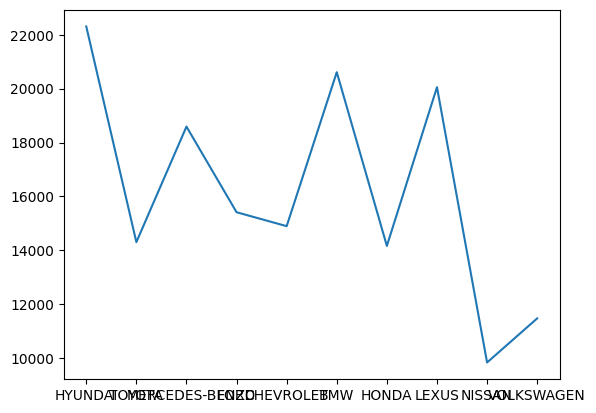

In [19]:
plt.plot(top10cars.index,top10meanPrices)
plt.show()

In [20]:
corr=data.corr(numeric_only=True)
corr

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


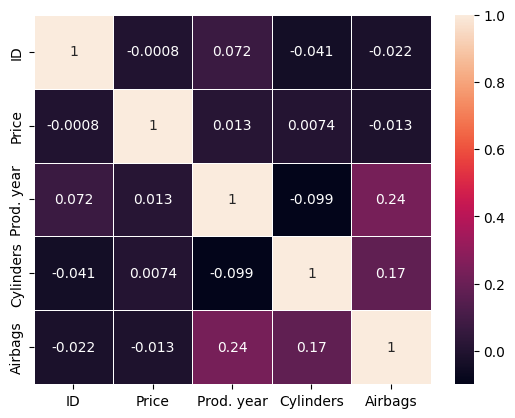

In [21]:
sns.heatmap(corr,linewidths='0.5',annot=True)
plt.show()


In [22]:
data_object=data.select_dtypes(include='object')
data_object

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


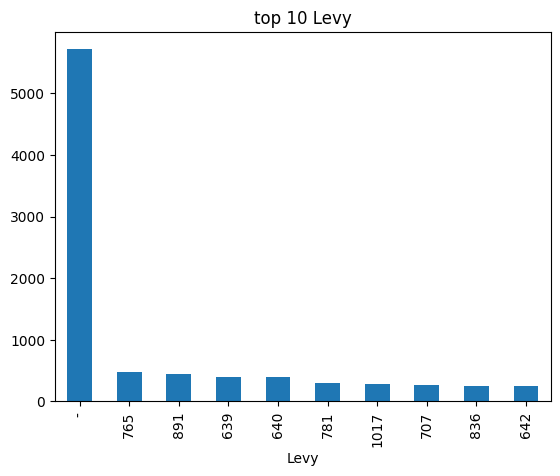

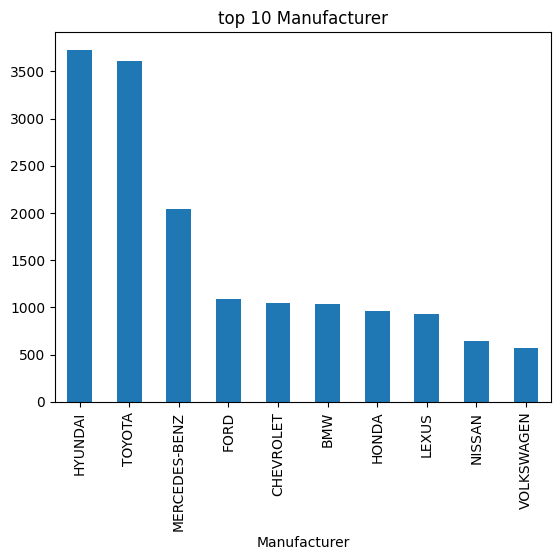

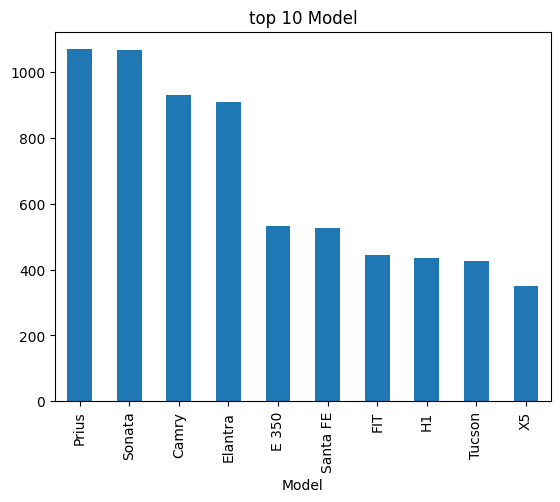

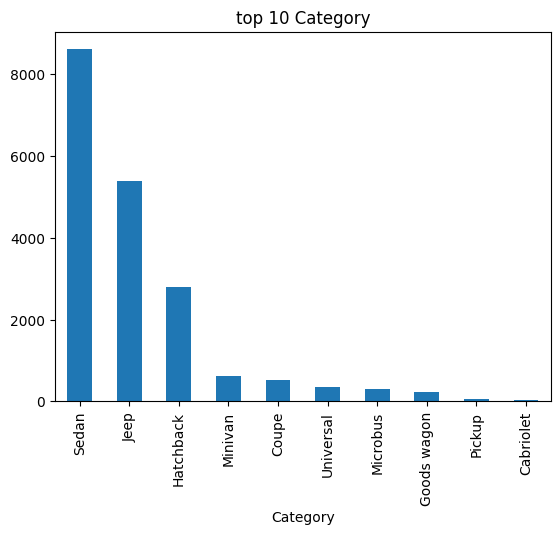

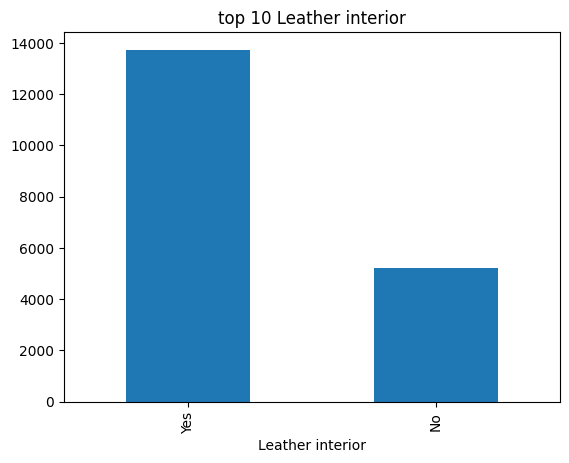

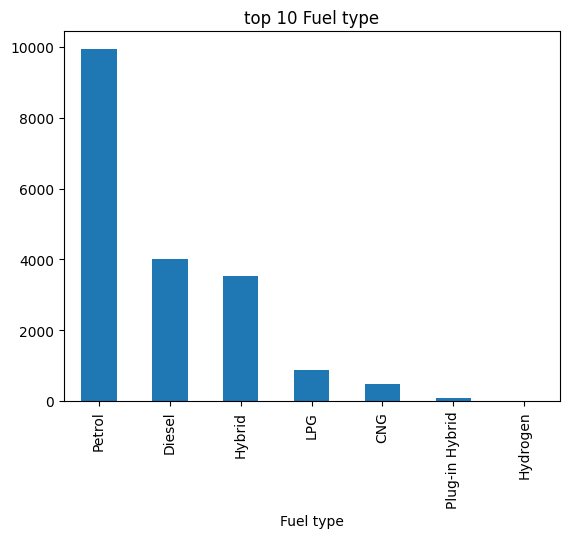

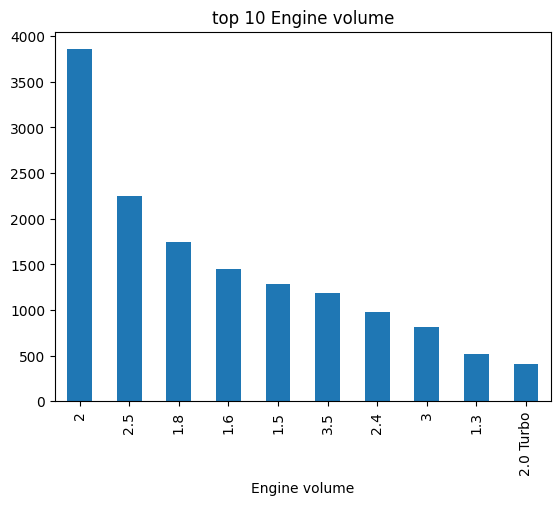

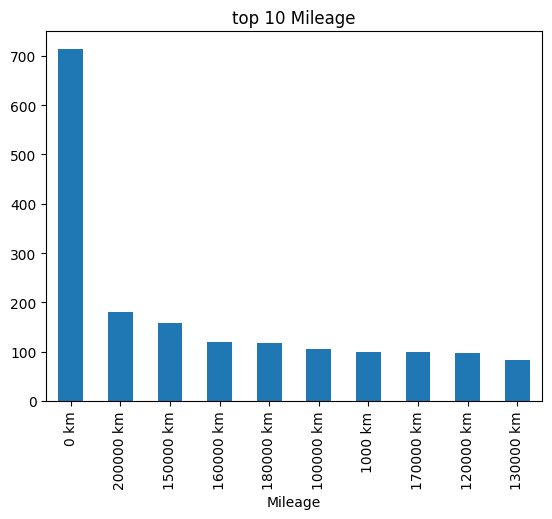

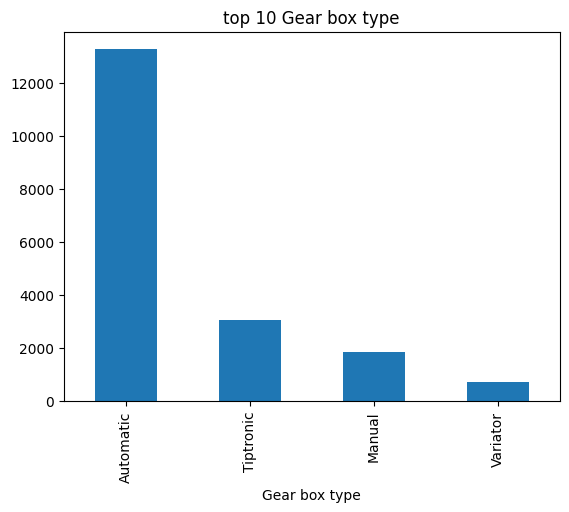

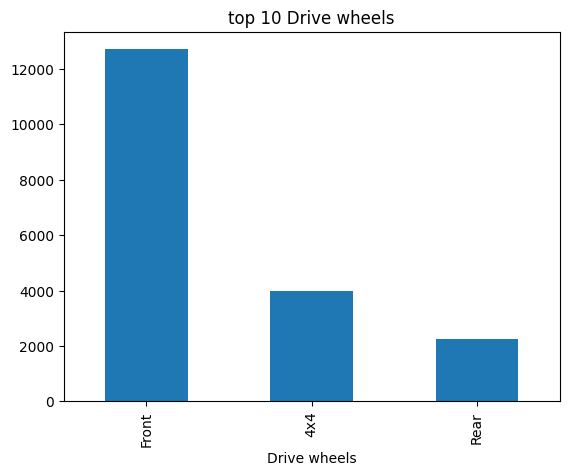

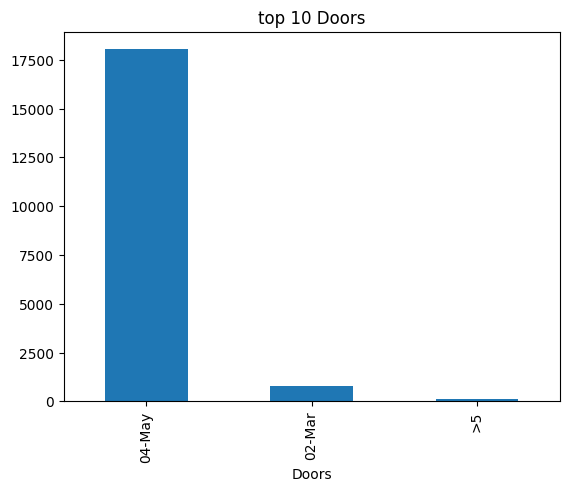

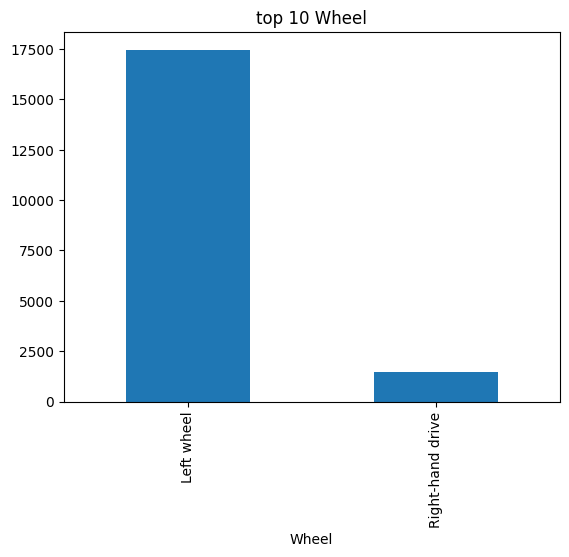

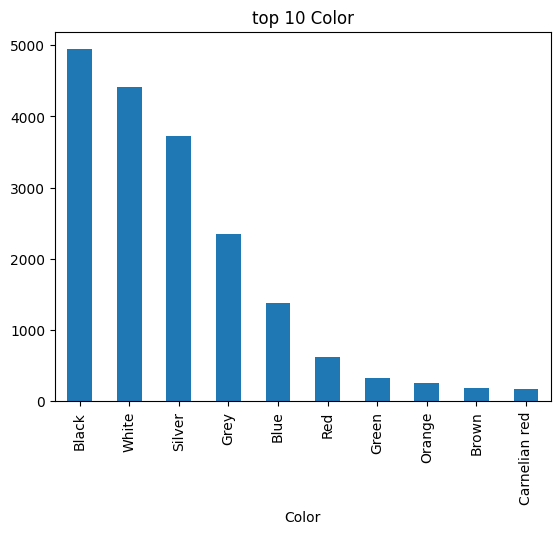

In [23]:
for col in data_object:
    plt.Figure(figsize=(15,5))
    top10=data[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title('top 10'+' '+col)
    plt.show()
    


3.Data Preprocessing

In [24]:
data=data.drop(['ID','Doors'],axis=1)

In [25]:
import datetime
dtime=datetime.datetime.now()

In [26]:
data['Age']=dtime.year-data['Prod. year']

In [27]:
data=data.drop(['Prod. year'],axis=1)

In [28]:
data.Levy.replace({'-':'0'},inplace=True)
data['Levy']=data['Levy'].astype(int)

In [29]:
data.Levy.value_counts()

Levy
0       5709
765      482
891      453
639      403
640      398
        ... 
2308       1
4860       1
1641       1
1045       1
1901       1
Name: count, Length: 559, dtype: int64

In [30]:
data['Mileage']=data['Mileage'].str.replace('km','')

In [31]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [32]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','')
data['Engine volume']=data['Engine volume'].astype('float')

Detect Outlier

In [55]:
data_numeric=data.select_dtypes(exclude='object')
for col in data_numeric.columns:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outlier in {col} are {outlier}--{round(100*(outlier)/total,2)}%")
    if outlier>0:
        data=data.loc[(data[col]<=high)&(data[col]>=low)]


Total Outlier in Manufacturer are 0--0.0%
Total Outlier in Model are 0--0.0%
Total Outlier in Category are 0--0.0%
Total Outlier in Leather interior are 0--0.0%
Total Outlier in Fuel type are 0--0.0%
Total Outlier in Mileage are 0--0.0%
Total Outlier in Gear box type are 0--0.0%
Total Outlier in Drive wheels are 0--0.0%
Total Outlier in Wheel are 0--0.0%
Total Outlier in Color are 0--0.0%
Total Outlier in Price are 0--0.0%
Total Outlier in Levy are 0--0.0%
Total Outlier in Engine volume are 0--0.0%
Total Outlier in Cylinders are 0--0.0%
Total Outlier in Airbags are 0--0.0%
Total Outlier in Age are 0--0.0%


Transform Data

In [56]:
dobject=data.select_dtypes(include="object")
dnumeric=data.select_dtypes(exclude="object")

In [57]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [58]:
for col in dobject.columns:
    dobject[col] = la.fit_transform(dobject[col])

In [59]:
data=pd.concat([dobject,dnumeric],axis=1)
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
4,16,347,3,1,4,5679,0,1,0,12,11726,446,1.3,4.0,4,11
5,17,683,4,1,1,1778,0,1,0,14,39493,891,2.0,4.0,4,9
6,43,616,3,1,2,3046,0,1,0,14,1803,761,1.8,4.0,12,15
7,17,697,8,1,4,2681,0,1,0,7,549,751,2.4,4.0,12,12
8,43,194,8,1,2,3787,0,1,0,1,1098,394,2.5,4.0,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,17,313,8,1,4,3029,0,1,0,1,470,831,1.6,4.0,12,8
19222,17,697,8,1,3,5101,0,1,0,12,10036,639,2.0,4.0,4,11
19230,43,616,3,1,2,3364,0,1,0,12,470,645,1.8,4.0,12,14
19234,17,770,4,1,1,533,0,1,0,7,26108,836,2.0,4.0,4,15


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6280 entries, 4 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      6280 non-null   int64  
 1   Model             6280 non-null   int64  
 2   Category          6280 non-null   int64  
 3   Leather interior  6280 non-null   int64  
 4   Fuel type         6280 non-null   int64  
 5   Mileage           6280 non-null   int64  
 6   Gear box type     6280 non-null   int64  
 7   Drive wheels      6280 non-null   int64  
 8   Wheel             6280 non-null   int64  
 9   Color             6280 non-null   int64  
 10  Price             6280 non-null   int64  
 11  Levy              6280 non-null   int64  
 12  Engine volume     6280 non-null   float64
 13  Cylinders         6280 non-null   float64
 14  Airbags           6280 non-null   int64  
 15  Age               6280 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 834.1 K

4-Model

In [61]:
x=data.drop('Price',axis=1)
y=data['Price']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [64]:
Algorithm=['LinearRegression', 'Decision TreeRegressor', 'Random Forest Regressor', 'GradientBoostingRegressor', 'XGBRegressor', 'SVR']

R2=[]

RMSE=[]

In [65]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    score=model.score(x_test,y_test)
    R2.append(r2)
    RMSE.append(rmse)
    print(f"The Score of Model is :{score}")

In [66]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=XGBRegressor()
model6=SVR()


In [67]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

The Score of Model is :0.3222806932548449
The Score of Model is :0.7981400399095474
The Score of Model is :0.8785251227366866
The Score of Model is :0.8157688687101118
The Score of Model is :0.8733167052268982
The Score of Model is :-0.0024495364811329967


In [68]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.322281,10399.563736
1,Decision TreeRegressor,0.798140,5675.645785
2,Random Forest Regressor,0.878525,4402.845302
3,GradientBoostingRegressor,0.815769,5422.152167
4,XGBRegressor,0.873317,4496.244210
5,SVR,-0.002450,12647.988197


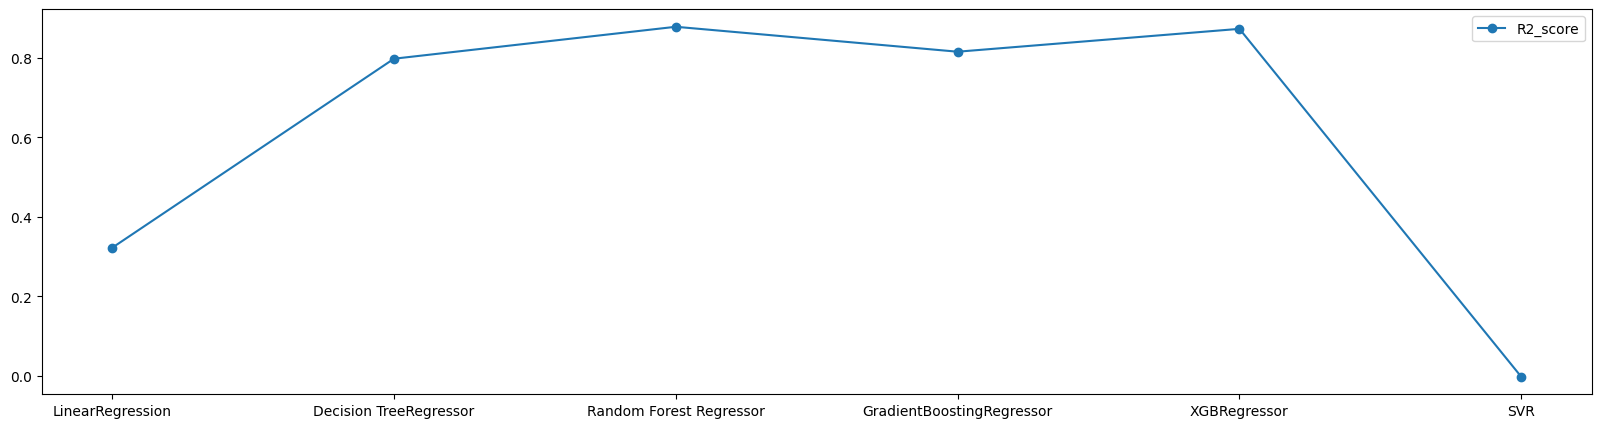

In [69]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_score,label='R2_score',marker='o')
plt.legend()
plt.show()


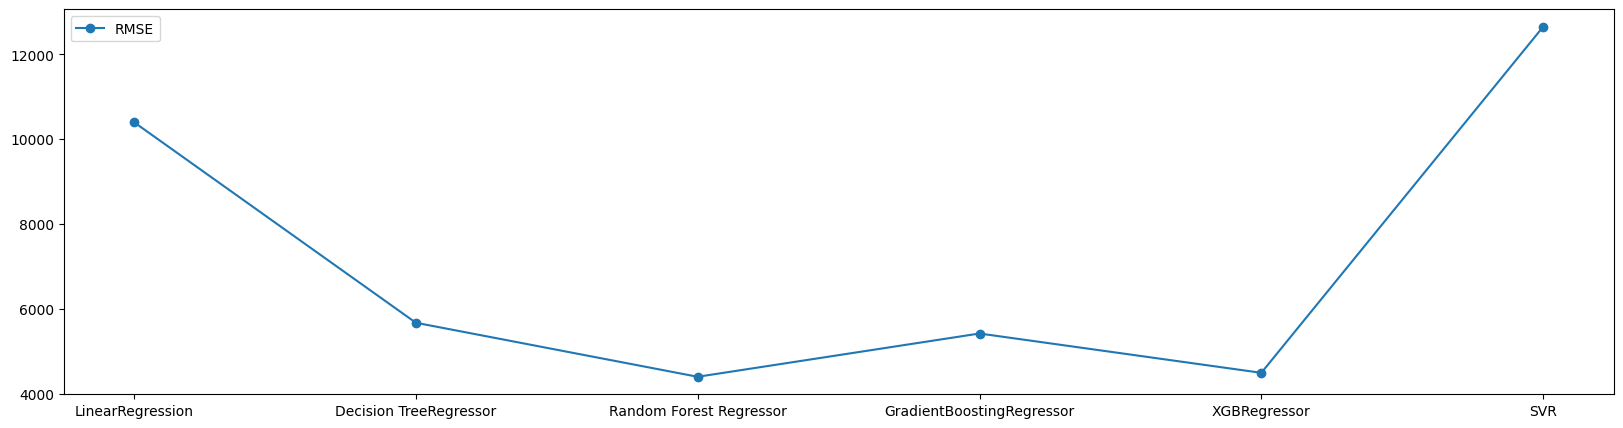

In [70]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.RMSE,label='RMSE',marker='o')
plt.legend()
plt.show()


In [71]:
import pickle

In [72]:
file_name='cars_Predictions.sav'

In [73]:
pickle.dump(model3,open(file_name,'wb'))

In [74]:
data.Manufacturer.unique()

array([16, 17, 43, 31,  6, 12,  9, 40, 26, 14, 45, 11, 24, 30, 27, 21,  2,
       29, 20, 10,  0, 19,  4,  7, 42, 41, 25, 28,  3])